# 1. Initialise

In [43]:
!pip install pystac_client
!pip install planetary_computer
!pip install odc-stac
!pip install odc.stac
!pip install rioxarray
!pip install rasterio
!pip install xrspatial



In [ ]:
####
# 1. Load Packages
####
# Load Packages
import numpy as np
import pystac_client
import planetary_computer
import odc.stac
import rioxarray
import rasterio
import xrspatial
from rasterio.enums import Resampling

# 2. Data

In [4]:
####
# 1. Obtain Data
####
# Define Catalog
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",modifier=planetary_computer.sign_inplace)

# Obtain Area of Interest
bbox_of_interest = [4.541943,52.193249,5.212109,52.532048] 
time_of_interest = "2022-06-01/2022-09-30" 

# Search Data
search = catalog.search(collections=["sentinel-2-l2a"],
                        bbox=bbox_of_interest,
                        datetime=time_of_interest,
                        query={"eo:cloud_cover": {"lt": 20}})

# Obtain Data
items = search.item_collection()

# Select Item from List
selected_item = items[4]

# Obtain Bands of Interest
data = odc.stac.stac_load([selected_item], bands = ['red', 'green', 'blue', 'nir'], bbox = bbox_of_interest).isel(time=0)

# 3. Pre-Process

In [ ]:
####
# 1. NDVI
####
# Calculate NDVI
red = data['red'].astype('float')
nir = data['nir'].astype('float')
ndvi = (nir - red) / (nir + red)

####
# 2. Reproject
####
# Convert to EPSG

In [ ]:
# Calculate NDVI
# red = data['red'].astype('float')
# nir = data['nir'].astype('float')
# ndvi.values = (nir - red) / (nir + red)

In [15]:
ndvi = xrspatial.multispectral.ndvi(data['nir'], data['red'])

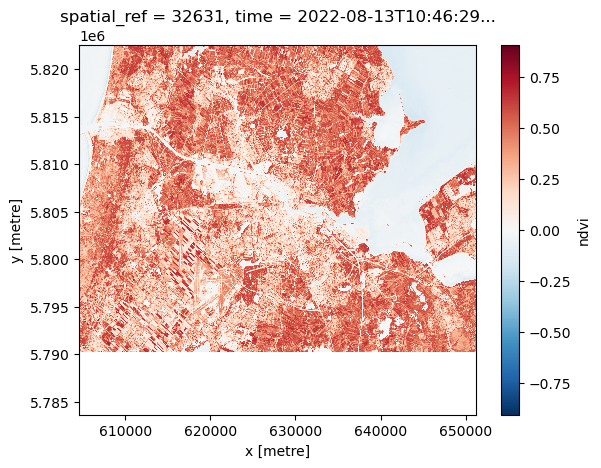

In [20]:
ndvi.plot()

In [35]:
# Convert to EPSG28992

ndvi_RD = ndvi.rio.reproject("EPSG:28992", resampling= Resampling.nearest, nodata=np.nan)


# 4. Focal Statistics
## 4.1 Focal Statistics: 100m Buffer

In [44]:
####
# 1. Focal Statistics: 100 meter
####
# Obtain Kernel for Buffer of 100m (r = 21 for 10x10m resolution)
ndvi_filter_100 = np.ones((21, 21))

# Apply Focal Statistics (Mean)
ndvi_output_100.values = xrspatial.focal.apply(ndvi_RD, ndvi_filter_100)

####
# 2. Store
####
# Store in TIF-file
ndvi_output_100.rio.to_raster('./data/Greenness/NDVI_Amsterdam_100m.tif', compress = 'LZw')

In [45]:
ndvi_output_100

<xarray.DataArray 'focal_apply' (y: 4039, x: 4787)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 9.641e+04 9.642e+04 ... 1.443e+05 1.443e+05
  * y            (y) float64 5.064e+05 5.064e+05 ... 4.661e+05 4.661e+05
    time         datetime64[ns] 2022-08-13T10:46:29.024000
    spatial_ref  int32 0
Attributes:
    _FillValue:  nan

## 4.2 Focal Statistics: 300m Buffer

In [46]:
####
# 1. Focal Statistics: 300 meter
####
# Obtain Kernel for Buffer of 300m (r = 61 for 10x10m resolution)
ndvi_filter_300 = np.ones((61, 61))

# Apply Focal Statistics (Mean)
ndvi_output_300 = xrspatial.focal.apply(ndvi_RD, ndvi_filter_300)

####
# 2. Store
####
# Store in TIF-file
ndvi_output_300.rio.to_raster('./data/Greenness/NDVI_Amsterdam_300m.tif', compress = 'LZw')

## 4.3 Focal Statistics: 500m Buffer

In [47]:
####
# 1. Focal Statistics: 500 meter
####
# Obtain Kernel for Buffer of 500m (r = 101 for 10x10m resolution)
ndvi_filter_500 = np.ones((101, 101))

# Apply Focal Statistics (Mean)
ndvi_output_500 = xrspatial.focal.apply(ndvi_RD, ndvi_filter_500)

####
# 2. Store
####
# Store in TIF-file
ndvi_output_500.rio.to_raster('./data/Greenness/NDVI_Amsterdam_500m.tif', compress = 'LZw')